In [1]:
import  rastereasy


In [2]:
name_im='./data/demo/sentinel.tif'
image=rastereasy.Geoimage(name_im)

## Make some boolean tests on image

### 1) higher, lower, equal, ... (>, <, ==)

All classical operations are possible (`<`, `<=` , `==`, ...), between two Geoimages, or between a Geoimage and a number

In [3]:
# Example with >= with a number
im_1500=(image>=1500)
im_1500.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




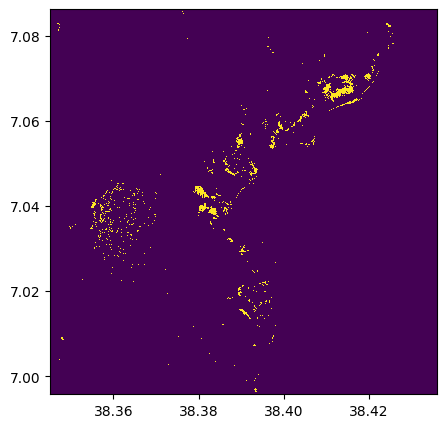

In [4]:
# Visu of one band
im_1500.visu(2)

In [5]:
# Example with == and a number
test_equal = (image==im_1500)
test_equal.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




In [6]:
# Example with != and a number
test_inequal = (image!=im_1500)
test_inequal.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 1
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32637
- Nodata: 0

- Given names for spectral bands: 
   {'4': 1}




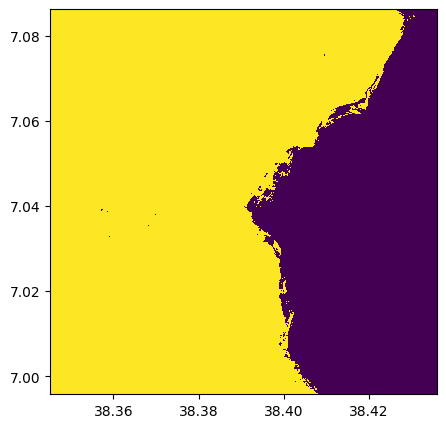

In [7]:
# Example with <= between two Geoimages

# For the example, we extract two bands (number 4 and 8) and compare them
band4=image.select_bands('4')
band8=image.select_bands('8')
band4_lowerthan_8 = (band4 < band8)
band4_lowerthan_8.info()
band4_lowerthan_8.visu()

And so on ...

In [8]:
im=image.numpy_channel_last()
print(im.shape)


(1000, 1000, 12)


### 2) Isnan

isnan() is directly implemented with `image.isnan()`

In [9]:
imnan = image.isnan()
imnan.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: bool
- Projection system: EPSG:32637

- Given names for spectral bands: 
   {'1_isnan': 1, '2_isnan': 2, '3_isnan': 3, '4_isnan': 4, '5_isnan': 5, '6_isnan': 6, '7_isnan': 7, '8_isnan': 8, '9_isnan': 9, '10_isnan': 10, '11_isnan': 11, '12_isnan': 12}




### 3) change value

the function `image.where()` is similar than `np.where()`

In [10]:
help(image.where)

Help on method where in module rastereasy.rastereasy:

where(condition, value1, value2) method of rastereasy.rastereasy.Geoimage instance
    Select values based on a condition, similar to numpy.where().
    
    This method allows for conditional operations, selecting values from
    `value1` where `condition` is True, and from `value2` where it's False.
    
    Parameters
    ----------
    condition : Geoimage
        Boolean mask indicating where to select values from `value1`
    value1 : Geoimage or scalar
        Values to use where condition is True
    value2 : Geoimage or scalar
        Values to use where condition is False
    
    Returns
    -------
    Geoimage
        New Geoimage containing the result of the conditional selection
    
    Examples
    --------
    >>> # Create a cloud-free composite from two images
    >>> cloud_free = image1.where(cloud_mask, image2, image1)
    >>>
    >>> # Threshold an image
    >>> thresholded = image.where(image > 100, 255, 0)



- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}




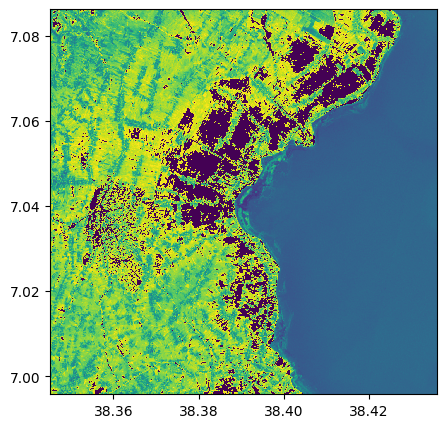

In [11]:
im_change100=image.where(image>=1500,3,image)
im_change100.info()
im_change100.visu(3)

In [12]:
im_change_nan=image.where(image.isnan(),0,image)
im_change_nan.info()


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12}


